In [2]:
#导入基本模块
import numpy as np
import pandas as pd
import os

#导入画图模块
import matplotlib.pyplot as plt
import seaborn as sns

# 使用自带的样式进行美化
plt.style.use('seaborn')
# 正常显示中文字体
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

#忽略warnings
import warnings
warnings.filterwarnings('ignore')
#图表显示设置
%matplotlib inline

#清理内存
import gc


In [3]:
#模型训练前把数据分组用的train_test_split, 计算效果得分roc_auc_score, 用到基础模型xgboost,
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score 

In [4]:
#导入训练集数据
df_train=pd.read_csv('E:\\文档\\A-实习\\shixi\\application_train.csv')
print('训练集数据大小',df_train.shape)
df_train.head()

训练集数据大小 (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#导入测试集数据
df_test=pd.read_csv('E:\\文档\\A-实习\\shixi\\application_test.csv')
print('测试集数据大小',df_test.shape)
df_test.head()

测试集数据大小 (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#查看一下相关度
correlations = df_train.corr()['TARGET'].sort_values()

print('正相关:\n', correlations.tail(15))
print('\n负相关:\n', correlations.head(15))

正相关:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

负相关:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATO

DAYS_BIRTH    0
TARGET        0
dtype: int64


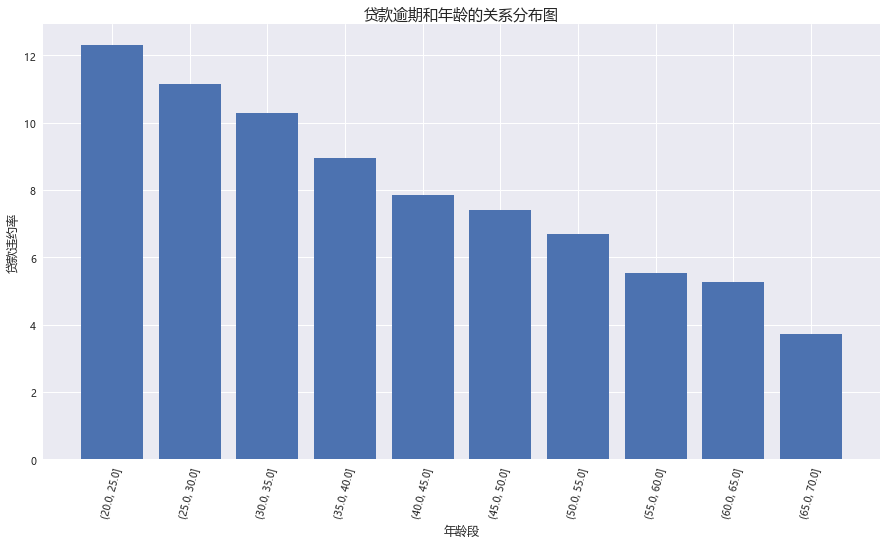

In [7]:
#对年龄进行分区
age = df_train[['DAYS_BIRTH', 'TARGET']]
#查看该列空值情况
print(age.isnull().sum())
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / -365
age['YEARS_BINNED'] = pd.cut(age['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups = age.groupby('YEARS_BINNED').mean()
#作图
plt.figure(figsize = (15, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.title('贷款逾期和年龄的关系分布图',fontsize = 15)
plt.xlabel('年龄段',fontsize = 12)
plt.ylabel('贷款违约率',fontsize = 12)
plt.xticks(rotation = 75)
plt.show()

OCCUPATION_TYPE    96391
TARGET                 0
dtype: int64
不同职业的贷款违约人数和违约率                        违约人数    总人数        违约率
OCCUPATION_TYPE                              
Accountants             474   9813   4.830327
Cleaning staff          447   4653   9.606705
Cooking staff           621   5946  10.443996
Core staff             1738  27570   6.303954
Drivers                2107  18603  11.326130
HR staff                 36    563   6.394316
High skill tech staff   701  11380   6.159930
IT staff                 34    526   6.463878
Laborers               5838  55186  10.578770
Low-skill Laborers      359   2093  17.152413
Managers               1328  21371   6.214028
Medicine staff          572   8537   6.700246
Private service staff   175   2652   6.598793
Realty agents            59    751   7.856192
Sales staff            3092  32102   9.631799
Secretaries              92   1305   7.049808
Security staff          722   6721  10.742449
Waiters/barmen staff    152   1348  11.275964
n

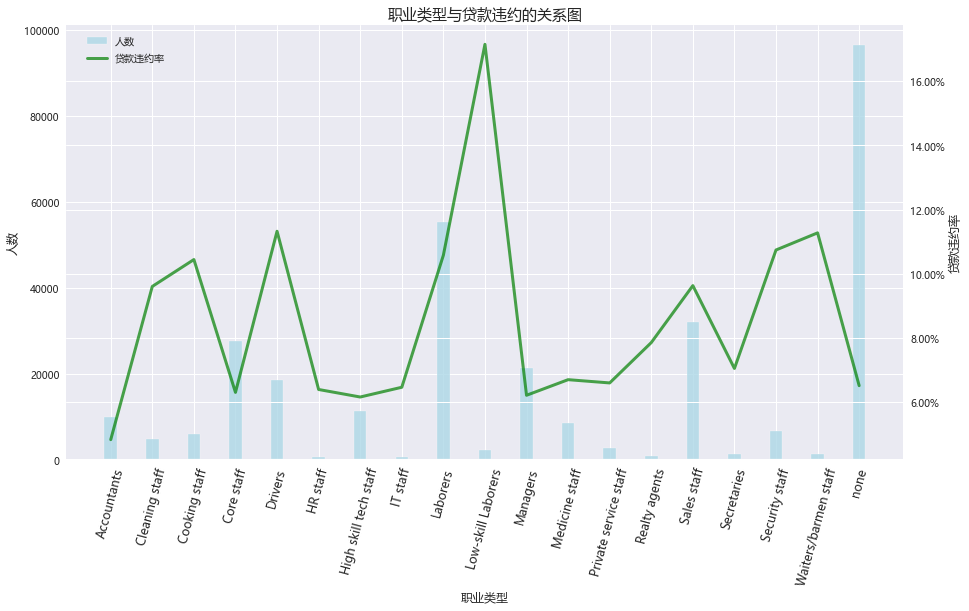

In [8]:
#职业类型与违约情况
job = df_train.loc[:, ['OCCUPATION_TYPE', 'TARGET']]

#查看该列空值情况,采用空值填充
print(job.isnull().sum())
job.fillna('none', inplace = True)

#job_1表示不同职业中贷款违约的人数
job_1 = job.groupby('OCCUPATION_TYPE').sum( )
job_1.rename(columns={'TARGET':'违约人数'},inplace=True)

#job_2表示各个职业的总人数
job_2 = job.groupby('OCCUPATION_TYPE').count( )
job_2.rename(columns={'TARGET':'总人数'},inplace=True)


#job_3表示不同职业的人中贷款违约率
#job_3 = job_1['违约人数'] / job_2['总人数'] *100
#job_3.columns=["OCCUPATION_TYPE","违约率"]
job_3= pd.Series(job_1['违约人数'] / job_2['总人数'] *100,name='违约率')
job_3=pd.DataFrame(job_3)
#print(job_3)
#合并job_1 and job_2 and job_3
from functools import reduce
dfs=[job_1,job_2,job_3]
results=reduce(lambda left,right:pd.merge(left,right,on='OCCUPATION_TYPE'),dfs)
#results=pd.merge(job_1,job_3,on='OCCUPATION_TYPE',how='left',suffixes=('_违约人数','_违约率'))
print("不同职业的贷款违约人数和违约率",results)

job_3.reset_index(inplace = True)
job_2.reset_index(inplace = True)
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(111)
#人数
ax1.bar('OCCUPATION_TYPE', '总人数', data = job_2, width = 0.3, edgecolor = 'w', label = '人数', color = 'lightblue', alpha = 0.8)
plt.xlabel('职业类型', fontsize = 12)
plt.ylabel('人数', fontsize = 12)
plt.xticks(rotation = 75, fontsize = 12)

#设置双坐标轴，右侧Y轴
ax2 = ax1.twinx( )
#设置右侧Y轴显示百分数
import matplotlib.ticker as mticker
fmt = '%0.2f%%'
yticks = mticker.FormatStrFormatter(fmt)
#贷款违约率
ax2.plot(job_3['OCCUPATION_TYPE'], job_3['违约率'], label = '贷款违约率', linewidth = 3, color = 'green', alpha = 0.7)
ax2.yaxis.set_major_formatter(yticks)

ax1.set_ylabel('人数', fontsize = 12)
ax2.set_ylabel('贷款违约率', fontsize = 12)
legend1 = ax1.legend(loc = (.02,.94), fontsize = 10, shadow = True)
legend2 = ax2.legend(loc = (.02,.9), fontsize = 10, shadow = True)
plt.title('职业类型与贷款违约的关系图', fontsize = 15) 
plt.show( )

In [9]:
#年收入与贷款违约情况
income_year= df_train.loc[:, ['AMT_INCOME_TOTAL','TARGET']]
income_year.describe()

,AMT_INCOME_TOTAL,TARGET
count,3.075110e+05,307511.000000
mean,1.687979e+05,0.080729
std,2.371231e+05,0.272419
min,2.565000e+04,0.000000
25%,1.125000e+05,0.000000
50%,1.471500e+05,0.000000
75%,2.025000e+05,0.000000
max,1.170000e+08,1.000000


In [10]:
"""
由于数据的极差过大，所以去掉极值，这里仅选用前95%的数据作图分析
"""

'\n由于数据的极差过大，所以去掉极值，这里仅选用前95%的数据作图分析\n'

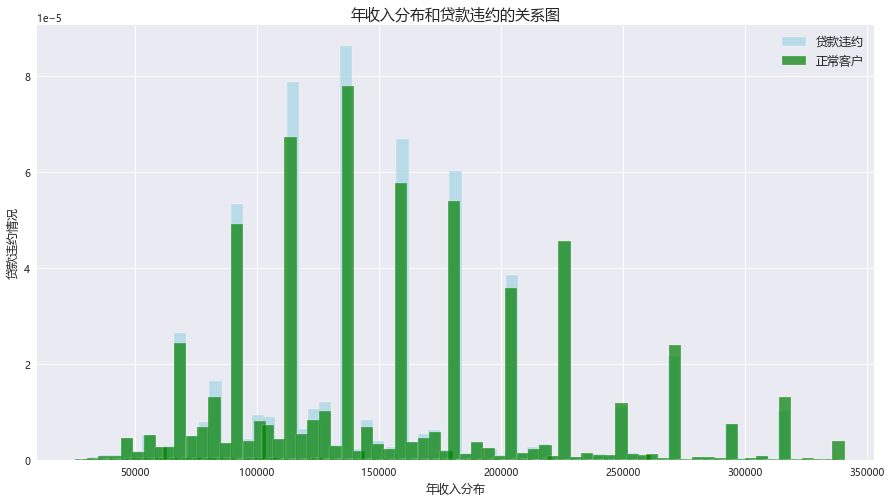

In [11]:
#icm_1表示贷款违约客户的年总收入，icm_0表示正常客户的年总收入
icm_1=income_year[income_year['TARGET']==1]['AMT_INCOME_TOTAL']
icm_0=income_year[income_year['TARGET']==0]['AMT_INCOME_TOTAL']

#分别取逾期和正常客户年总收入的前98%数据
icm_1_95=icm_1[icm_1<=np.percentile(icm_1,95)]
icm_0_95=icm_0[icm_0<=np.percentile(icm_0,95)]

fig, ax = plt.subplots(figsize = (15, 8), sharex = True)
plt.hist(icm_1_95.values, bins = 200, label = '贷款违约', density = True, width = 5000, alpha = 0.8, color = 'lightblue', edgecolor = 'w')
plt.hist(icm_0_95.values, bins = 200, label = '正常客户', density = True, width = 5000, alpha = 0.7, color = 'green', edgecolor = 'w')
plt.title('年收入分布和贷款违约的关系图', fontsize = 15)
plt.xlabel('年收入分布', fontsize = 12)
plt.ylabel('贷款违约情况', fontsize = 12)
plt.legend(fontsize = 'large')
plt.show()

In [12]:
#负债水平与贷款违约情况
loan_icm=df_train.loc[:,['AMT_CREDIT','AMT_INCOME_TOTAL','TARGET']]
#算出贷款金额和年收入的比例
loan_icm['负债水平']=df_train['AMT_CREDIT']/df_train['AMT_INCOME_TOTAL']
loan_icm.describe()

,AMT_CREDIT,AMT_INCOME_TOTAL,TARGET,负债水平
count,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,5.990260e+05,1.687979e+05,0.080729,3.957570
std,4.024908e+05,2.371231e+05,0.272419,2.689728
min,4.500000e+04,2.565000e+04,0.000000,0.004808
25%,2.700000e+05,1.125000e+05,0.000000,2.018667
50%,5.135310e+05,1.471500e+05,0.000000,3.265067
75%,8.086500e+05,2.025000e+05,0.000000,5.159880
max,4.050000e+06,1.170000e+08,1.000000,84.736842


In [13]:
"""
负债水平的差距过大，极大值远远超出平均水平
从表中来看，年收入高的负债水平也高，同时更容易违约
差距太大因此去掉极大值，取前95%的数据进行分析
"""

'\n负债水平的差距过大，极大值远远超出平均水平\n从表中来看，年收入高的负债水平也高，同时更容易违约\n差距太大因此去掉极大值，取前95%的数据进行分析\n'

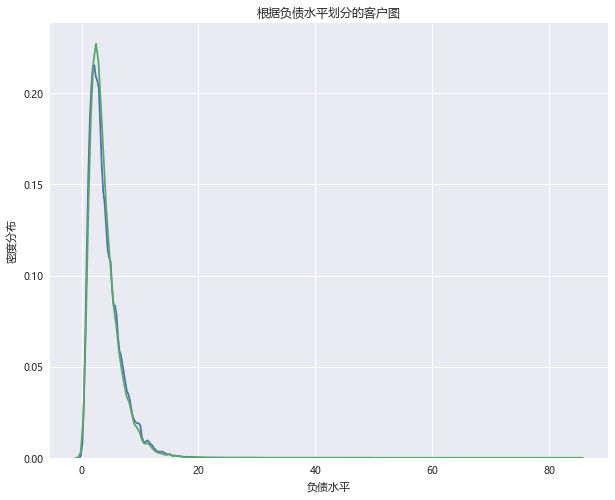

In [14]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(loan_icm.loc[loan_icm['TARGET'] == 0, '负债水平'], label = '正常客户')

# KDE plot of loans which were not repaid on time
sns.kdeplot(loan_icm.loc[loan_icm['TARGET'] == 1,  '负债水平'], label = '贷款违约客户')

# Labeling of plot
plt.xlabel('负债水平')
plt.ylabel('密度分布')
plt.title('根据负债水平划分的客户图');

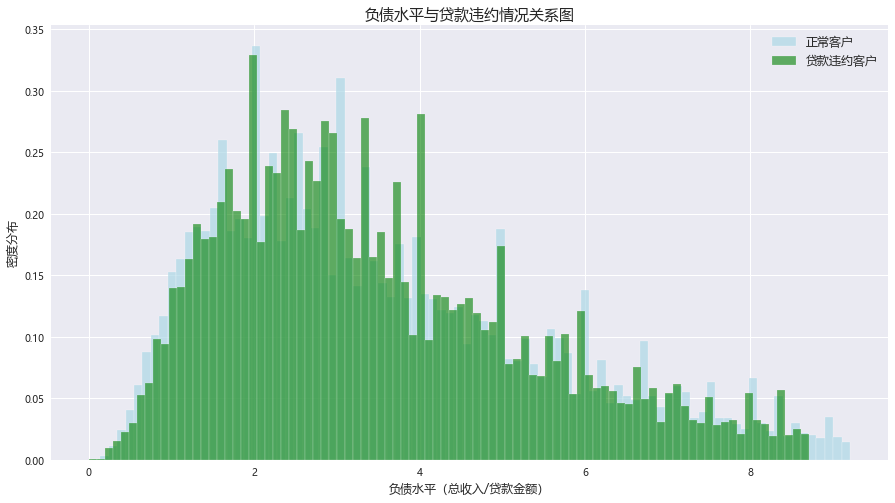

In [15]:
loan_icm_0=loan_icm[loan_icm['TARGET']==0]['负债水平']
loan_icm_1=loan_icm[loan_icm['TARGET']==1]['负债水平']

#分别取逾期和正常客户年债务收入比的前95%数据
loan_icm_0_95= loan_icm_0[loan_icm_0 <= np.percentile(loan_icm_0, 95)]
loan_icm_1_95= loan_icm_1[loan_icm_1 <= np.percentile(loan_icm_1, 95)]
fig, ax = plt.subplots(figsize =(15, 8), sharex = True)

plt.hist(loan_icm_0_95.values, bins = 90, label = '正常客户', density = True, alpha = 0.7, color = 'lightblue', edgecolor = 'w')
plt.hist(loan_icm_1_95.values, bins = 90, label = '贷款违约客户', density = True, alpha = 0.6, color = 'green', edgecolor = 'w')
plt.title('负债水平与贷款违约情况关系图', fontsize = 15)
plt.xlabel('负债水平（总收入/贷款金额）', fontsize = 12)
plt.ylabel('密度分布', fontsize = 12)
plt.legend(fontsize = 'large')
plt.show()

In [16]:
#将训练集和测试集放到一个dataframe里（df_all）
df_all=pd.concat([df_train.loc[:,'SK_ID_CURR':'AMT_REQ_CREDIT_BUREAU_YEAR'],
                  df_test.loc[:,'SK_ID_CURR':'AMT_REQ_CREDIT_BUREAU_YEAR']])
df_all=df_all.reset_index(drop=True)
df_all.drop('TARGET',axis=1,inplace=True)
print(df_all.shape)
df_all.head(20)

(356255, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


0    282686
1     24825
Name: TARGET, dtype: int64
训练集中用户违约率为：8.07%


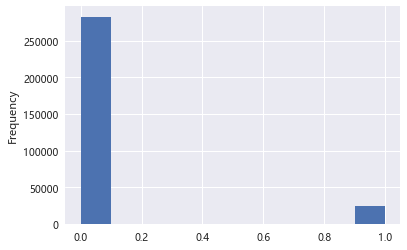

In [17]:
#查看训练集中标签的分布情况
print(df_train['TARGET'].value_counts())

#绘制出标签分布的直方图
df_train['TARGET'].astype(int).plot.hist()
#df_train['TARGET'].astype(int).plot.pie()

#TARGRT=0:贷款偿还； TARGRT=1:贷款违约
#计算出训练集中的用户逾期率(由于是二分类，逾期用户标签为1，因此用sum代替逾期用户的总数量)
perc_target=(100 * df_train['TARGET'].sum()/df_train['TARGET'].count()).round(4)
print('训练集中用户违约率为：%0.2f%%'% perc_target)

In [18]:
"""
从上图可以看出，训练集标签的分布非常不平衡，按时偿还贷款的人数远超违约的人数,
因此下面需要利用更复杂的机器学习模型来对这些分类进行评估和预测。
"""

'\n从上图可以看出，训练集标签的分布非常不平衡，按时偿还贷款的人数远超违约的人数,\n因此下面需要利用更复杂的机器学习模型来对这些分类进行评估和预测。\n'

In [19]:
#定义查找缺失值的列以及占比的函数,将得到的数据存入miss_table中
def miss_value_table(df):
    miss_value=df.isnull().sum()
    #计算缺失值的百分比
    miss_val_perc=100 * df.isnull().sum()/len(df)
    miss_table=pd.concat([miss_value,miss_val_perc],axis=1)
    miss_table=miss_table.rename(columns={0:'Missing values',1:'% of Total Values'})
    #选择出缺失值不为0的行，按照缺失值占比降序排列（保留两位小数）
    miss_table=miss_table[miss_table.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(2)
    return miss_table

In [20]:
#生成训练集的miss_table表
miss_value_table(df_train).head(20)

,Missing values,% of Total Values
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [21]:
#生成测试集的miss_table表
miss_value_table(df_test).head(20)

,Missing values,% of Total Values
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
COMMONAREA_AVG,33495,68.72
NONLIVINGAPARTMENTS_MEDI,33347,68.41
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
FONDKAPREMONT_MODE,32797,67.28
LIVINGAPARTMENTS_MODE,32780,67.25
LIVINGAPARTMENTS_MEDI,32780,67.25
LIVINGAPARTMENTS_AVG,32780,67.25


In [22]:
"""
可以看到train和test表的空缺列基本一致，前十位空缺列都接近70%的比率
"""

'\n可以看到train和test表的空缺列基本一致，前十位空缺列都接近70%的比率\n'

In [23]:
#查看表中数据类型，方便分开处理
df_all.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [24]:
#处理表中非数值类型的数据
df_all.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [25]:
#发现性别（CODE_GENDER）有三种值，查看
df_all['CODE_GENDER'].value_counts()

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
#用NAN替换异常值
df_all['CODE_GENDER'].replace('XNA',np.nan,inplace=True)
df_all['CODE_GENDER'].value_counts()

F    235126
M    121125
Name: CODE_GENDER, dtype: int64

In [27]:
#计算文本列特征和target的相关度
feature_obj=df_all.dtypes[df_all.dtypes == 'object'].index
feat_num = df_all.dtypes[df_all.dtypes != 'object'].index
feat_obj_dum=pd.get_dummies(df_all[feature_obj],dummy_na=True)
df_all=pd.concat([df_all,feat_obj_dum],axis=1)
#删除原文本列
df_all.drop(feature_obj,axis=1,inplace=True)
feat_obj_dum['TARGET']=df_train['TARGET']

In [28]:
#用train表数据，outliers表示需要删除的行索引
outlier_indices = []
for i in feat_num:
    Q1 = df_train[i].quantile(0.05)
    Q3 = df_train[i].quantile(0.95)
    IQR = Q3 - Q1
    outliers = df_train[(df_train[i] < Q1 - 1.5 * IQR) | (df_train[i] > Q3 + 1.5 * IQR)].index
    outlier_indices.extend(outliers)
#可能存在重复的行索引，先去重
from collections import Counter
outlier_indices = Counter(outlier_indices)#字典形式出现
multiple_outliers = []
for key, values in outlier_indices.items():#字典.items() 函数以列表返回可遍历的(键, 值) 元组数组
    if values > 2:
        multiple_outliers.append(key)
#需删掉的行数
len(multiple_outliers)
df_all.drop(multiple_outliers, inplace = True)
#train数据集去除outliers后的行列数
df_all.shape

(350615, 260)

In [29]:
#选择文本列和target的相关系数，选取target列进行排序
obj_corr=feat_obj_dum.corr()
obj_corr=obj_corr['TARGET']

In [30]:
abs(obj_corr).sort_values(ascending=False).head(10)

TARGET                                               1.000000
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZATION_TYPE_XNA                                0.045987
OCCUPATION_TYPE_Laborers                             0.043019
EMERGENCYSTATE_MODE_No                               0.042201
Name: TARGET, dtype: float64

In [31]:
"""
从上图可以看出，工作类型、受教育程度、性别这些文本列的相关度比较靠前
"""

'\n从上图可以看出，工作类型、受教育程度、性别这些文本列的相关度比较靠前\n'

In [32]:
del feat_obj_dum
gc.collect()

3324

In [33]:
#对数值列进行分析
df_all.loc[ : , ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,350615.000000,350615.000000,350615.000000,350615.000000
mean,-16045.355005,64581.360732,-4990.502340,-3002.123420
std,4359.483947,141924.171539,3524.866056,1518.300477
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19681.000000,-2780.000000,-7480.000000,-4318.000000
50%,-15761.000000,-1223.000000,-4509.000000,-3251.000000
75%,-12430.000000,-288.000000,-2009.000000,-1717.000000
max,-7338.000000,365243.000000,0.000000,0.000000


In [34]:
"""
发现DAYS_EMPLOYED的最大值365243天
约等于1000年，可能是异常值，下面对该列进行分析。
"""

'\n发现DAYS_EMPLOYED的最大值365243天\n约等于1000年，可能是异常值，下面对该列进行分析。\n'

Text(0.5, 0, 'DAYS_EMPLOYED')

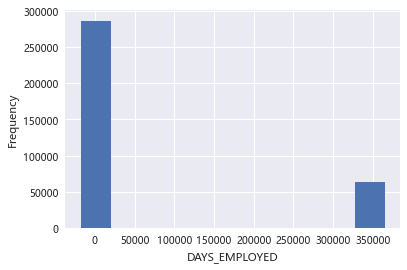

In [35]:
#绘制直方图
df_all['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('DAYS_EMPLOYED')

In [36]:
"""
图中显示，工龄为异常值的人数超过5万人，合理怀疑该数字是用于特殊标记的一种方法。
为了验证猜想，计算出异常值和正常值的贷款违约率，并进行比较分析。
"""

'\n图中显示，工龄为异常值的人数超过5万人，合理怀疑该数字是用于特殊标记的一种方法。\n为了验证猜想，计算出异常值和正常值的贷款违约率，并进行比较分析。\n'

In [37]:
#计算工龄异常客户和正常客户的违约率
abnor=df_train[df_train['DAYS_EMPLOYED']==365243]
norml=df_train[df_train['DAYS_EMPLOYED']!=365243]
rate_an=100 * abnor['TARGET'].mean()
rate_no=100 * norml['TARGET'].mean()

print('异常值人数:', len(abnor))
print('工龄异常客户的违约率: %0.2f%%' % rate_an)
print('正常客户的违约率 :  %0.2f%%' % rate_no)

异常值人数: 55374
工龄异常客户的违约率: 5.40%
正常客户的违约率 :  8.66%


In [38]:
del abnor,norml
gc.collect()


63

In [39]:
"""
可以看出工龄异常的客户违约率要低于正常客户的违约率，因此将其作为一个特征
新增一列DAYS_EMPLOYED_abnorm，用1表示
"""

'\n可以看出工龄异常的客户违约率要低于正常客户的违约率，因此将其作为一个特征\n新增一列DAYS_EMPLOYED_abnorm，用1表示\n'

In [40]:
#新增一列DAYS_EMPLOYED_abnorm来作为标记特征。
df_all['DAYS_EMPLOYED_abnorm']=df_all['DAYS_EMPLOYED']==365243
df_all['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)

abnorm_dum=pd.get_dummies(df_all['DAYS_EMPLOYED_abnorm'],dummy_na=True)
df_all=pd.concat([df_all,abnorm_dum],axis=1)
df_all.drop(['DAYS_EMPLOYED_abnorm'],axis=1,inplace=True)

In [41]:
del abnorm_dum
gc.collect()

80

In [42]:
#工作时间占年龄的比率
df_all['EMPLOYED_TO_AGE'] = df_all['DAYS_EMPLOYED'] / df_all['DAYS_BIRTH']
#总收入占贷款的比率
df_all['INCOME_TO_CREDIT'] = df_all['AMT_INCOME_TOTAL'] / df_all['AMT_CREDIT']
#该用户家庭的人均收入
df_all['ICMTOL_TO_FAMNUM'] = df_all['AMT_INCOME_TOTAL'] / df_all['CNT_FAM_MEMBERS']
#贷款年金占总收入的比率
df_all['ANNU_TO_ICMTOL'] = df_all['AMT_ANNUITY'] / df_all['AMT_INCOME_TOTAL']
#贷款年金占贷款的比率
df_all['ANNU_TO_CREDIT'] = df_all['AMT_ANNUITY'] / df_all['AMT_CREDIT']

In [43]:
"""
之前的相关系数中，发现'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1'虽然呈负相关
原表对它的解释是“来自外部数据源的归一化分数”
数值较大且为负相关，这说明随着这三个属性值的上升，客户越不容易产生贷款违约行为。


"""

"\n之前的相关系数中，发现'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1'虽然呈负相关\n原表对它的解释是“来自外部数据源的归一化分数”\n数值较大且为负相关，这说明随着这三个属性值的上升，客户越不容易产生贷款违约行为。\n\n\n"

190926
653
68560
    index  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0       0      0.083037      0.262949      0.139376
1       6      0.774761      0.724000      0.492060
2       8      0.587334      0.205747      0.751724
3      10      0.319760      0.651862      0.363945
4      11      0.722044      0.555183      0.652897
5      12      0.464831      0.715042      0.176653
6      15      0.115634      0.346634      0.678568
7      21      0.437709      0.233767      0.542445
8      25      0.561948      0.651406      0.461482
9      28      0.600396      0.685011      0.524496
10     36      0.842763      0.681699      0.754406
11     37      0.804586      0.719799      0.722393
12     42      0.468208      0.674203      0.399676
13     48      0.710427      0.589187      0.466864
14     50      0.656225      0.450850      0.479449
15     51      0.311510      0.713355      0.309275
16     52      0.244562      0.705947      0.799297
17     53      0.189596      0.702979      0.70

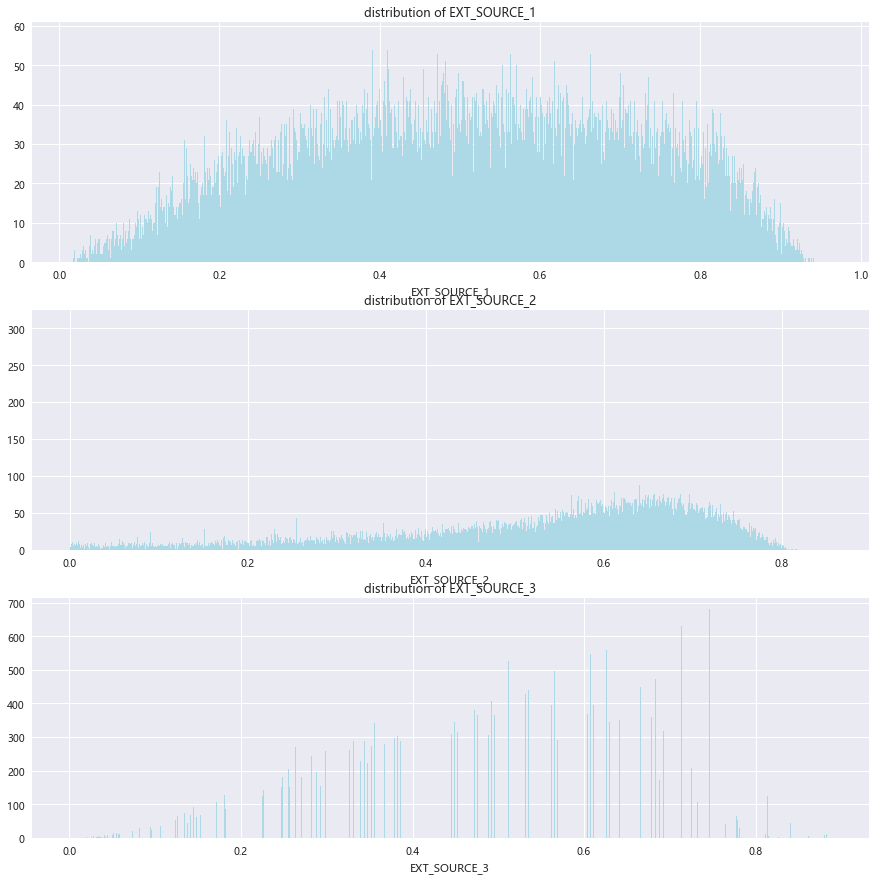

In [44]:
#把这三列单独拿出来分析,去除里面的空值
EXT_SOURCE=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
df_EXT_SOURCE=df_all[EXT_SOURCE]
for i in EXT_SOURCE:
    print(df_EXT_SOURCE[i].isnull().sum())

df_EXT_SOURCE.dropna(inplace=True)
#重置索引
df_EXT_SOURCE.reset_index(inplace=True)
print(df_EXT_SOURCE.head(20))

plt.figure(figsize = (15, 15))
for i, col in enumerate(EXT_SOURCE):
    plt.subplot(3, 1, i + 1)
    plt.hist(df_EXT_SOURCE[col], bins = 5000, color = 'lightblue')
    plt.title('distribution of %s' % col)
    plt.xlabel('%s' % col)

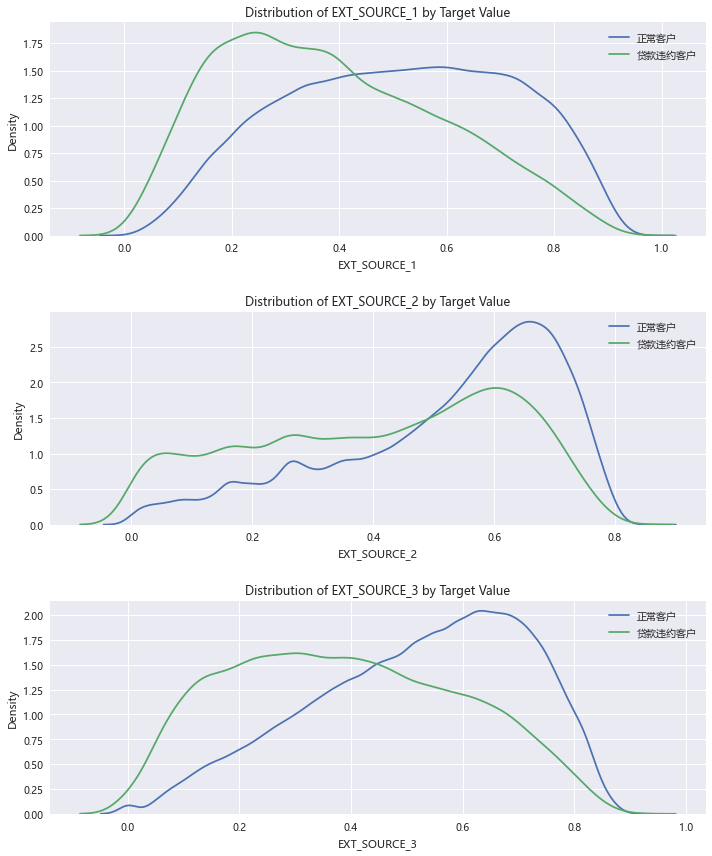

In [45]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(EXT_SOURCE):
    # 创建三个子图
    plt.subplot(3, 1, i + 1)
    # 如期偿还贷款
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = '正常客户')
    # 发生违约情况
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = '贷款违约客户')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)


In [46]:
#分析剩余的表
#用bureau和bureau_balance表做特征
bureau=pd.read_csv('E:\文档\A-实习\shixi/bureau.csv')
bur_bal=pd.read_csv('E:\文档\A-实习\shixi/bureau_balance.csv')

In [47]:
#定义一个只对字符列做独热编码的函数
def one_hot_encoder(df, nan_category = True):
    original_cols = list(df.columns)
    categorial_cols = [col for col in df.columns if df[col].dtypes == 'object']
    df = pd.get_dummies(df, columns = categorial_cols, dummy_na = nan_category)
    new_columns = [i for i in df.columns if i not in original_cols]
    return df, new_columns

In [48]:
bur_obj=bureau.dtypes[bureau.dtypes=='object'].index
bur_bal_obj=bur_bal.dtypes[bur_bal.dtypes=='object'].index
bureau[bur_obj].apply(pd.Series.nunique,axis=0)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [49]:
bur_bal[bur_bal_obj].apply(pd.Series.nunique,axis=0)

STATUS    8
dtype: int64

In [50]:
bureau,bureau_cat=one_hot_encoder(bureau)
bur_bal,bur_bal_cat=one_hot_encoder(bur_bal)
#print(bureau_cat)
#统计最小值，最大值，出现笔数
bur_bal_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size'] } 
for i in bur_bal_cat:
    #算出占比和总次数
    bur_bal_aggregations[i] = ['mean','sum'] 

bur_bal_agg = bur_bal.groupby('SK_ID_BUREAU').agg(bur_bal_aggregations)
tem = []
for i in bur_bal_agg.columns.tolist():
    tem.append(i[0] + '_' + i[1])
bur_bal_agg.columns = pd.Index(tem)
bur_bal_agg.head()
#按SK_ID_BUREAU连接bureau和bb表
bureau = bureau.join(bur_bal_agg, how= 'left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis= 1, inplace= True)

In [51]:
del bur_bal_agg, bur_bal
gc.collect()

1186239

In [52]:
bureau.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,STATUS_4_mean,STATUS_4_sum,STATUS_5_mean,STATUS_5_sum,STATUS_C_mean,STATUS_C_sum,STATUS_X_mean,STATUS_X_sum,STATUS_nan_mean,STATUS_nan_sum
0,215354,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#最后统计每个SK_ID_CURR的历史SK_ID_BUREAU信息。对所有数值计算最小值，最大值，均值，方差，总和
tem = bureau.columns.tolist()
num_agg = { }
for i in tem:
    if i != 'SK_ID_CURR':
        num_agg[i] = ['min','max','mean','var','sum']
bureau_agg = bureau.groupby('SK_ID_CURR', as_index = False).agg(num_agg)

tem = [ ]
tem.append('SK_ID_CURR')
for i in bureau_agg.columns.tolist():
    if i[0] != 'SK_ID_CURR':
        tem.append('bureau' + '_' + i[0] + '_' + i[1])
bureau_agg.columns = pd.Index(tem)
bureau_agg.head()


,SK_ID_CURR,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_var,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_var,...,bureau_STATUS_nan_mean_min,bureau_STATUS_nan_mean_max,bureau_STATUS_nan_mean_mean,bureau_STATUS_nan_mean_var,bureau_STATUS_nan_mean_sum,bureau_STATUS_nan_sum_min,bureau_STATUS_nan_sum_max,bureau_STATUS_nan_sum_mean,bureau_STATUS_nan_sum_var,bureau_STATUS_nan_sum_sum
0,100001,-1572,-49,-735.000000,240043.666667,-5145,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,-1437,-103,-874.000000,186150.000000,-6992,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,-2586,-606,-1400.750000,827783.583333,-5603,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,100004,-1326,-408,-867.000000,421362.000000,-1734,0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4,100005,-373,-62,-190.666667,26340.333333,-572,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#拼接到df_all表上，记为df_allX
df_allX = df_all.merge(bureau_agg, how = 'left', on= 'SK_ID_CURR')
df_allX.shape

(350615, 563)

In [55]:
del bureau, bureau_agg
gc.collect()

21

In [56]:
#用installments_payments表做特征
ist_pmt=pd.read_csv('E:\文档\A-实习\shixi/installments_payments.csv')
#计算每一笔逾期天数，找出出现逾期的用户及逾期次数
ist_pmt.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [57]:
#新增一列DEFAULT_DAY，表示每笔的逾期天数
ist_pmt['DEFAULT_DAY'] = ist_pmt['DAYS_ENTRY_PAYMENT'] - ist_pmt['DAYS_INSTALMENT']
#逾期天数大于0
tem = ist_pmt[ist_pmt['DEFAULT_DAY'] > 0]
tem = tem.loc[: ,['SK_ID_CURR','DEFAULT_DAY']]
#计算每个SK_ID_CURR的逾期总天数和逾期总次数
default_days_agg = tem.groupby('SK_ID_CURR', as_index = False).agg({ 'DEFAULT_DAY' : [ 'sum', 'count']})

print(default_days_agg.head())

  SK_ID_CURR DEFAULT_DAY      
                     sum count
0     100001        11.0     1
1     100005         1.0     1
2     100007        63.0    16
3     100008      1317.0     1
4     100009         7.0     1


In [58]:
tem = []
tem.append('SK_ID_CURR')
for i in default_days_agg.columns.tolist():
    if i[0] != 'SK_ID_CURR':
        tem.append('ip' + '_' + i[0] + '_' + i[1])
default_days_agg.columns = pd.Index(tem)

print(default_days_agg.head())

   SK_ID_CURR  ip_DEFAULT_DAY_sum  ip_DEFAULT_DAY_count
0      100001                11.0                     1
1      100005                 1.0                     1
2      100007                63.0                    16
3      100008              1317.0                     1
4      100009                 7.0                     1


In [59]:
df_allX = df_allX.merge(default_days_agg, how = 'left', on = 'SK_ID_CURR')

In [60]:
del default_days_agg
gc.collect()

21

In [61]:
#新增一列"MONEY"计算每个用户历史借款次数和总分期数
ist_pmt['MONEY']=ist_pmt['AMT_INSTALMENT']-ist_pmt['AMT_PAYMENT']
temp = ist_pmt.loc[: ,['SK_ID_PREV', 'SK_ID_CURR', 'MONEY']]
temp = temp.groupby(['SK_ID_CURR','SK_ID_PREV'], as_index = False).count().rename(columns={'MONEY': 'TIMES'})
temp = temp.groupby('SK_ID_CURR', as_index = False).agg({'SK_ID_PREV': 'count', 'TIMES': 'sum'})
temp = temp.rename(index = str, columns = {"SK_ID_PREV": "ip_CREDIT_TIMES", "TIMES": "ip_TOTAL_INSTALLMENT_TIMES"})
temp.head()

,SK_ID_CURR,ip_CREDIT_TIMES,ip_TOTAL_INSTALLMENT_TIMES
0,100001,2,7
1,100002,1,19
2,100003,3,25
3,100004,1,3
4,100005,1,9


In [62]:
df_allX=df_allX.merge(temp,how='left',on='SK_ID_CURR')
df_allX.shape

(350615, 567)

In [63]:
#计算每笔分期的逾期金额
temp= ist_pmt.groupby('SK_ID_CURR', as_index = False).agg({'AMT_INSTALMENT':'sum', 'AMT_PAYMENT':'sum'})
temp['ist_pmt_default_money'] = temp['AMT_INSTALMENT'] - temp['AMT_PAYMENT']
temp = temp.loc[:,['SK_ID_CURR','ist_pmt_default_money']]
df_allX = df_allX.merge(temp, how = 'left', on= 'SK_ID_CURR')
df_allX.shape

(350615, 568)

In [64]:
del ist_pmt,temp
gc.collect()

21

In [65]:
#用credit_card_balance表做特征
ccb = pd.read_csv('E:\文档\A-实习\shixi/credit_card_balance.csv')
ccb[ccb['SK_ID_CURR'] == 100006].sort_values('MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1636141,1489396,100006,-6,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
520387,1489396,100006,-2,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.0,270000,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [66]:
#增加['STATUS_COMPLETED']一列，1表示Contract status = 'Completed'，0为其他状态
ccb['STATUS_COMPLETED'] = 0
for i in range(ccb['NAME_CONTRACT_STATUS'].shape[0]):
    if ccb['NAME_CONTRACT_STATUS'].values[i] == 'Completed':
        ccb['STATUS_COMPLETED'].values[i] = 1

In [67]:
ccb, ccb_cat = one_hot_encoder(ccb)

In [68]:
ccb_cat_agg = { }
for i in ccb_cat:
    ccb_cat_agg[i] = ['mean','sum']
    
ccb_num_agg = { 
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean'],
    'STATUS_COMPLETED':['sum']
}

ccb_num = ['AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM']
for i in ccb_num:
    ccb_num_agg[i] = ['min', 'max', 'mean', 'sum', 'var']

In [69]:
ccb_agg = ccb.groupby('SK_ID_CURR', as_index = False).agg({**ccb_cat_agg, **ccb_num_agg})

In [70]:
tem = [ ]
tem.append('SK_ID_CURR')
for i in ccb_agg.columns.tolist():
    if i[0] != 'SK_ID_CURR':
        tem.append('ccb' + '_' + i[0] + '_' + i[1])
ccb_agg.columns = pd.Index(tem)

In [71]:
ccb_agg['ccb_count'] = ccb.groupby('SK_ID_CURR').size()

In [72]:
"""
对['STATUS_COMPLETED']做特征：每个SK_ID_CURR的借款笔数['ccb_PREV_CREDIT_COUNT']、
'Completed'笔数的占比['ccb_COMPLETED_PERC']
"""

"\n对['STATUS_COMPLETED']做特征：每个SK_ID_CURR的借款笔数['ccb_PREV_CREDIT_COUNT']、\n'Completed'笔数的占比['ccb_COMPLETED_PERC']\n"

In [73]:
total_completed = ccb.loc[ : , ['SK_ID_CURR', 'STATUS_COMPLETED']].groupby('SK_ID_CURR', as_index = False).sum()
credt_count = ccb.loc[ : , ['SK_ID_CURR', 'SK_ID_PREV']].groupby(
    'SK_ID_CURR', as_index = False).count().rename(columns = {'SK_ID_PREV' : 'ccb_PREV_CREDIT_COUNT'})
tem = total_completed.merge(credt_count, how = 'left', on = 'SK_ID_CURR')
tem['ccb_COMPLETED_PERC'] = tem['STATUS_COMPLETED'] / tem['ccb_PREV_CREDIT_COUNT']
print(tem.head())

   SK_ID_CURR  STATUS_COMPLETED  ccb_PREV_CREDIT_COUNT  ccb_COMPLETED_PERC
0      100006                 0                      6            0.000000
1      100011                 0                     74            0.000000
2      100013                 0                     96            0.000000
3      100021                10                     17            0.588235
4      100023                 0                      8            0.000000


In [74]:
ccb_agg = ccb_agg.merge(tem, how = 'left',on = 'SK_ID_CURR')
ccb_agg.head()

,SK_ID_CURR,ccb_NAME_CONTRACT_STATUS_Active_mean,ccb_NAME_CONTRACT_STATUS_Active_sum,ccb_NAME_CONTRACT_STATUS_Approved_mean,ccb_NAME_CONTRACT_STATUS_Approved_sum,ccb_NAME_CONTRACT_STATUS_Completed_mean,ccb_NAME_CONTRACT_STATUS_Completed_sum,ccb_NAME_CONTRACT_STATUS_Demand_mean,ccb_NAME_CONTRACT_STATUS_Demand_sum,ccb_NAME_CONTRACT_STATUS_Refused_mean,...,ccb_CNT_DRAWINGS_POS_CURRENT_var,ccb_CNT_INSTALMENT_MATURE_CUM_min,ccb_CNT_INSTALMENT_MATURE_CUM_max,ccb_CNT_INSTALMENT_MATURE_CUM_mean,ccb_CNT_INSTALMENT_MATURE_CUM_sum,ccb_CNT_INSTALMENT_MATURE_CUM_var,ccb_count,STATUS_COMPLETED,ccb_PREV_CREDIT_COUNT,ccb_COMPLETED_PERC
0,100006,1.000000,6,0.0,0,0.000000,0,0.0,0,0.0,...,NaN,0.0,0.0,0.000000,0.0,0.000000,NaN,0,6,0.000000
1,100011,1.000000,74,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,1.0,33.0,25.767123,1881.0,105.847793,NaN,0,74,0.000000
2,100013,1.000000,96,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,1.0,22.0,18.719101,1666.0,34.249745,NaN,0,96,0.000000
3,100021,0.411765,7,0.0,0,0.588235,10,0.0,0,0.0,...,NaN,0.0,0.0,0.000000,0.0,0.000000,NaN,10,17,0.588235
4,100023,1.000000,8,0.0,0,0.000000,0,0.0,0,0.0,...,NaN,0.0,0.0,0.000000,0.0,0.000000,NaN,0,8,0.000000


In [75]:
df_allX = df_allX.merge(ccb_agg,how = 'left', on= 'SK_ID_CURR')

In [76]:
df_allX.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ccb_CNT_DRAWINGS_POS_CURRENT_var,ccb_CNT_INSTALMENT_MATURE_CUM_min,ccb_CNT_INSTALMENT_MATURE_CUM_max,ccb_CNT_INSTALMENT_MATURE_CUM_mean,ccb_CNT_INSTALMENT_MATURE_CUM_sum,ccb_CNT_INSTALMENT_MATURE_CUM_var,ccb_count,STATUS_COMPLETED,ccb_PREV_CREDIT_COUNT,ccb_COMPLETED_PERC
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,6.0,0.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
del ccb, ccb_agg, total_completed, credt_count ,tem
gc.collect()

42

In [78]:
df_allX.fillna(0, inplace = True)
#取出去掉outliers行后的target
df_target_fin = df_train.drop(multiple_outliers)[['TARGET']].copy()
print(df_target_fin.shape)

(301871, 1)


In [79]:
del df_train
gc.collect()

42

In [80]:
df_allX.drop('SK_ID_CURR',axis = 1, inplace = True )
#df_allX.to_csv('df_allX.csv',encoding = 'utf-8',index = 0)
df_train_fin = df_allX.iloc[ : df_target_fin.shape[0], : ].copy()
df_test_fin = df_allX.iloc[df_target_fin.shape[0] : , : ].copy()
print(df_train_fin.shape,df_test_fin.shape)

del df_allX
gc.collect()

(301871, 680) (48744, 680)


21

In [81]:
df_train_fin.to_csv('df_train_fin.csv',encoding = 'utf-8',index = 0)
df_test_fin.to_csv('df_test_fin.csv',encoding = 'utf-8',index = 0)
df_target_fin.to_csv('df_target_fin.csv',encoding = 'utf-8',index = 0)

In [82]:
X = df_train_fin.values
y = df_target_fin['TARGET'].values
print(df_target_fin.shape)

(301871, 1)


In [83]:
del df_train_fin, df_target_fin
gc.collect()

42

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 5)

In [85]:
del X, y
gc.collect()

42

In [86]:

"""
from sklearn.metrics import roc_auc_score 
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn import svm
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}

other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 50, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgboost.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.grid_scores_
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))   
model = xgboost.XGBClassifier(n_estimatores = 200, max_depth = 8, subsample = 0.8, colsample_bytree = 0.8, 
                              min_child_weight = 50, random_state=27).fit(X_train, y_train)
#生成train数据放进模型后的答案
ans = model.predict_proba(X_test)
roc_auc_score(y_test, ans[ : , 1])

"""


"\nfrom sklearn.metrics import roc_auc_score \nimport xgboost\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import svm\ncv_params = {'n_estimators': [400, 500, 600, 700, 800]}\n\nother_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 50, 'seed': 0,\n                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}\n\nmodel = xgboost.XGBRegressor(**other_params)\noptimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1)\noptimized_GBM.fit(X_train, y_train)\nevalute_result = optimized_GBM.grid_scores_\nprint('每轮迭代运行结果:{0}'.format(evalute_result))\nprint('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))\nprint('最佳模型得分:{0}'.format(optimized_GBM.best_score_))   \nmodel = xgboost.XGBClassifier(n_estimatores = 200, max_depth = 8, subsample = 0.8, colsample_bytree = 0.8, \n                              min_child_weight = 50, random_state=27).fit(X_train, 

Accuracy: 0.9177639751552795
Precision: 0.4590964590964591
Recall: 0.07676602694977541


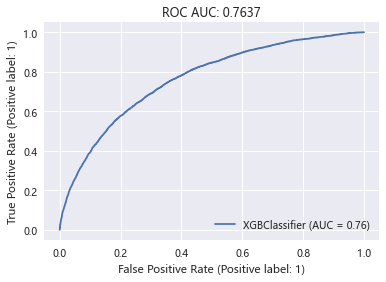

In [87]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, precision_score, recall_score 
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt

# Train the XGBoost model
model = xgboost.XGBClassifier(n_estimators=200, max_depth=8, subsample=0.8, colsample_bytree=0.8, 
                              min_child_weight=50, random_state=27).fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Get predicted probabilities for ROC AUC
y_pred_proba = model.predict_proba(X_test)

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Calculate and plot ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plot_roc_curve(model, X_test, y_test)
plt.title(f"ROC AUC: {roc_auc:.4f}")
plt.show()

from sklearn.model_selection import GridSearchCV
"""
# 定义参数范围
param_grid = {
    'max_depth': [5, 7, 9],
    'min_child_weight': [30, 50, 70],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 定义模型
xgb_model = xgboost.XGBClassifier(n_estimators=200, random_state=27)

# 网格搜索
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print('Best parameters:', grid_search.best_params_)
print('Best AUC score:', grid_search.best_score_)
"""




In [88]:
"""
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



predictors = [x for x in train.columns if x not in [target,IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

"""


"\nimport xgboost as xgb\nfrom xgboost.sklearn import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom matplotlib.pylab import rcParams\nrcParams['figure.figsize'] = 12, 4\n\n\n\npredictors = [x for x in train.columns if x not in [target,IDcol]]\nxgb1 = XGBClassifier(\n learning_rate =0.1,\n n_estimators=1000,\n max_depth=5,\n min_child_weight=1,\n gamma=0,\n subsample=0.8,\n colsample_bytree=0.8,\n objective= 'binary:logistic',\n nthread=4,\n scale_pos_weight=1,\n seed=27)\nmodelfit(xgb1, train, predictors)\n\n"

In [89]:
ans_test = model.predict_proba(df_test_fin.values)
print(ans_test)

[[0.97890395 0.02109605]
 [0.76765054 0.23234946]
 [0.9739122  0.02608781]
 ...
 [0.9947476  0.00525244]
 [0.99701446 0.00298554]
 [0.7267653  0.27323475]]


In [90]:
df_test_fin['TARGET'] = ans_test[:,1]
labels=['SK_ID_CURR','TARGET']
df_new=df_test_fin.loc[:,(df_test_fin.index.intersection(labels))]
df_new = df_test_fin.loc[:,].reset_index()
df_new['SK_ID_CURR'] = df_test['SK_ID_CURR']#用原本的test表
df_new[['SK_ID_CURR','TARGET']].to_csv('E:\文档\A-实习\shixi/predicted_xgboost.csv',encoding = 'utf-8',index = 0)

Accuracy: 0.914368530020704
Precision: 0.08282208588957055
Recall: 0.005512454062882809


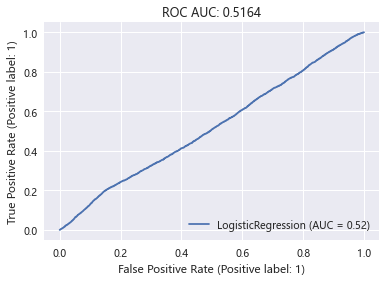

In [91]:
"""
from sklearn.linear_model import LogisticRegression
#逻辑回归预测
model= LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False).fit(X_train, y_train)
ans=model.predict_proba(X_test)
print(ans)
roc_auc_score(y_test,ans[:,1])
"""

from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Train the logistic regression model
model = LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False).fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Get predicted probabilities for ROC AUC
y_pred_proba = model.predict_proba(X_test)

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Calculate and plot ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plot_roc_curve(model, X_test, y_test)
plt.title(f"ROC AUC: {roc_auc:.4f}")
plt.show()


In [92]:
"""
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the model on training data
model = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train, y_train)

# Get predicted probabilities on test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and threshold values for various probability cutoffs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
"""



'\nfrom sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# Fit the model on training data\nmodel = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class=\'ovr\', n_jobs=None, penalty=\'l2\', random_state=None, solver=\'liblinear\', tol=0.0001, verbose=0, warm_start=False)\nmodel.fit(X_train, y_train)\n\n# Get predicted probabilities on test data\ny_pred_proba = model.predict_proba(X_test)[:, 1]\n\n# Calculate fpr, tpr, and threshold values for various probability cutoffs\nfpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)\n\n# Calculate AUC\nroc_auc = auc(fpr, tpr)\n\n# Plot the ROC curve\nplt.figure()\nlw = 2\nplt.plot(fpr, tpr, color=\'darkorange\', lw=lw, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\

In [93]:
#df_test_fin= df_test_fin.drop(['TARGET'], axis= 1)
df_test_fin=pd.read_csv('df_test_fin.csv')
ans_test=model.predict_proba(df_test_fin.values)
print(ans_test)

[[0.50670674 0.49329326]
 [0.54187598 0.45812402]
 [0.69504003 0.30495997]
 ...
 [0.80366191 0.19633809]
 [0.53526768 0.46473232]
 [0.85650498 0.14349502]]


In [94]:
# Submission dataframe
df_test_fin['TARGET'] =ans_test[:,1]
labels=['SK_ID_CURR','TARGET']
df_new=df_test_fin.loc[:,(df_test_fin.index.intersection(labels))]
df_new = df_test_fin.loc[:,].reset_index()
df_new['SK_ID_CURR'] = df_test['SK_ID_CURR']#用原本的test表
df_new[['SK_ID_CURR','TARGET']].to_csv('E:\文档\A-实习\shixi/predicted_logis.csv',encoding = 'utf-8',index = False)

In [95]:

"""
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

model =lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50).fit(X_train, y_train)
#生成train数据放进模型后的答案
ans = model.predict_proba(X_test)
roc_auc_score(y_test, ans[ : , 1])


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the model on training data
model =lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
model.fit(X_train, y_train)

# Get predicted probabilities on test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and threshold values for various probability cutoffs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

"""

'\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import roc_auc_score\nimport lightgbm as lgb\nimport gc\n\nmodel =lgb.LGBMClassifier(n_estimators=10000, objective = \'binary\', \n                                   class_weight = \'balanced\', learning_rate = 0.05, \n                                   reg_alpha = 0.1, reg_lambda = 0.1, \n                                   subsample = 0.8, n_jobs = -1, random_state = 50).fit(X_train, y_train)\n#生成train数据放进模型后的答案\nans = model.predict_proba(X_test)\nroc_auc_score(y_test, ans[ : , 1])\n\n\nfrom sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# Fit the model on training data\nmodel =lgb.LGBMClassifier(n_estimators=10000, objective = \'binary\', \n                                   class_weight = \'balanced\', learning_rate = 0.05, \n                                   reg_alpha = 0.1, reg_lambda = 0.1, \n                                   subsample = 0.8, n_jobs = -1, random_state = 50)\nmodel.fit(

Accuracy: 0.8962153209109731
Precision: 0.3047945205479452
Recall: 0.21804818293180891


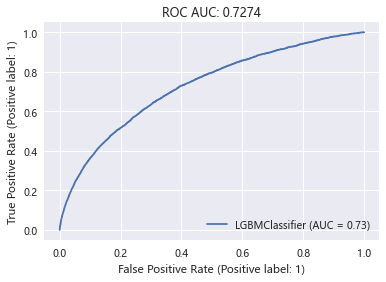

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, precision_score, recall_score
import lightgbm as lgb
import gc
import matplotlib.pyplot as plt

model =lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50).fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Get predicted probabilities for ROC AUC
y_pred_proba = model.predict_proba(X_test)

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Calculate and plot ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plot_roc_curve(model, X_test, y_test)
plt.title(f"ROC AUC: {roc_auc:.4f}")
plt.show()


In [97]:
#df_test_fin= df_test_fin.drop(['TARGET'], axis= 1)
df_test_fin=pd.read_csv('df_test_fin.csv')
ans_test=model.predict_proba(df_test_fin.values)
print(ans_test)

[[9.41983035e-01 5.80169646e-02]
 [6.48738944e-01 3.51261056e-01]
 [9.98636504e-01 1.36349650e-03]
 ...
 [9.87416808e-01 1.25831922e-02]
 [9.99860856e-01 1.39143996e-04]
 [1.81666513e-01 8.18333487e-01]]


In [98]:
df_test_fin['TARGET'] = ans_test[:,1]
labels=['SK_ID_CURR','TARGET']
df_new=df_test_fin.loc[:,(df_test_fin.index.intersection(labels))]
df_new = df_test_fin.loc[:,].reset_index()
df_new['SK_ID_CURR'] = df_test['SK_ID_CURR']#用原本的test表
df_new[['SK_ID_CURR','TARGET']].to_csv('E:\文档\A-实习\shixi/predicted_lightgbm.csv',encoding = 'utf-8',index = 0)